# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Tiara Fitri Adani
- **Email:** t.adani03@gmail.com
- **ID Dicoding:** [Input Username]

## Menentukan Pertanyaan Bisnis

**Dari kasus dataset yang ada, didapatkan pertanyaan bisnis seperti berikut.**
- Bagaimana tren penyewaan sepeda dari waktu ke waktu?
- Bagaimana perbedaan jumlah penyewaan sepeda pada berbagai kondisi cuaca?
- Apakah terdapat perbedaan signifikan dalam penyewaan sepeda di tiap musim?
- Pada jam berapa biasanya terjadi peningkatan penyewaan sepeda?
- Bagaimana perbandingan jumlah pengguna registered dan casual?

## Import Semua Packages/Library yang Digunakan

In [243]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [244]:
# Load tabel day
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [245]:
# Load tabel hour
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Data pada kolom season, yr, mnth, weekday, weathersit masih berupa kode
- Penamaan kolom masih sulit untuk dimengerti

### Assessing Data

#### Menilai data day_df

---

In [246]:
# Memeriksa tipe data
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Dataset day_df memiliki 731 baris dan 16 kolom.  
Tipe data masing-masing kolom dapat dilihat pada bagian Dtype.  

In [247]:
# Memeriksa missing value
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [248]:
# Memeriksa duplikat
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [249]:
# Memeriksa parameter statistik
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai data hour_df

---

In [250]:
# Memeriksa tipe data
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Dataset hour_df memiliki 17379 baris dan 17 kolom.  
Tipe data masing-masing kolom dapat dilihat pada bagian Dtype.  

In [251]:
# Memeriksa missing value
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [252]:
# Memeriksa duplikat
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [253]:
# Memeriksa parameter statistik
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Tipe data kolom dteday masih berupa object (string)
- Tipe data kolom season, yr, mnth, hr, holiday, weekday, workingday, dan weathersit masih berupa integer
- Data pada kolom temp, atemp, hum, windspeed masih berupa angka normalisasi
- Tidak ada missing value pada data day_df dan hour_df
- Tidak ada duplikat pada data day_df dan hour_df
- Pada pemeriksaan parameter statistik data day_df dan hour_df, angka yang dihasilkan masih belum sesuai, sebab tipe data yang belum sesuai

### Cleaning Data

**Berdasarkan insight yang dilakukan pada proses gathering data dan assessing data, terdapat beberapa hal yang perlu diatasi, yaitu.**
*   Menghapus kolom instant sebab urutan penomoran tidak terlalu penting untuk proses analisis data
*   Mengganti tipe data kolom dteday dari objecr (string) menjadi datetime
*   Mengganti tipe data kolom season, yr, mnth, hr, holiday, weekday, workingday, dan weathersit dari integer menjadi category
*   Menggati isi kode pada kolom season, yr, mnth, holiday, weekday, workingday, dan weathersit
*   Melakukan perubahan nilai normalisasi ke nilai sebenarnya pada kolom temp, atemp, hum, windspeed
*   Mengubah nama kolom agar mudah dipahami









**Menghapus kolom**

---

In [254]:
# Menghapus kolom instan pada dataset day_df dan hour_df
day_df.drop(columns=["instant"], inplace=True)
hour_df.drop(columns=["instant"], inplace=True)

**Mengganti tipe data**

---



In [255]:
# Mengganti tipe data kolom dteday dari object (string) menjadi datetime pada dataset day_df dan hour_df
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

# Mengganti tipe data kolom season, yr, mnth, holiday, weekday, workingday, dan weathersit dari integer menjadi category pada dataset day_df dan hour_df
day_df["season"] = day_df["season"].astype("category")
day_df["yr"] = day_df["yr"].astype("category")
day_df["mnth"] = day_df["mnth"].astype("category")
day_df["holiday"] = day_df["holiday"].astype("category")
day_df["weekday"] = day_df["weekday"].astype("category")
day_df["workingday"] = day_df["workingday"].astype("category")
day_df["weathersit"] = day_df["weathersit"].astype("category")

hour_df["season"] = hour_df["season"].astype("category")
hour_df["yr"] = hour_df["yr"].astype("category")
hour_df["mnth"] = hour_df["mnth"].astype("category")
hour_df["hr"] = hour_df["hr"].astype("category")
hour_df["holiday"] = hour_df["holiday"].astype("category")
hour_df["weekday"] = hour_df["weekday"].astype("category")
hour_df["workingday"] = hour_df["workingday"].astype("category")
hour_df["weathersit"] = hour_df["weathersit"].astype("category")

**Mengganti isi kode pada kolom**

---

In [256]:
# Menggati isi kode pada kolom season
day_df["season"] = day_df["season"].replace({1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"})
hour_df["season"] = hour_df["season"].replace({1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"})

# Menggati isi kode pada kolom yr
day_df["yr"] = day_df["yr"].replace({0: "2011", 1: "2012"})
hour_df["yr"] = hour_df["yr"].replace({0: "2011", 1: "2012"})

# Menggati isi kode pada kolom mnth
day_df["mnth"] = day_df["mnth"].replace({1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun", 7: "Jul", 8: "Aug", 9: "Sep",  10: "Oct", 11: "Nov", 12: "Dec"})
hour_df["mnth"] = hour_df["mnth"].replace({1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun", 7: "Jul", 8: "Aug", 9: "Sep",  10: "Oct", 11: "Nov", 12: "Dec"})

# Menggati isi kode pada kolom holiday
day_df["holiday"] = day_df["holiday"].replace({0: "No", 1: "Yes"})
hour_df["holiday"] = hour_df["holiday"].replace({0: "No", 1: "Yes"})

# Menggati isi kode pada kolom weekday
day_df["weekday"] = day_df["weekday"].replace({0: "Sun", 1: "Mon", 2: "Tue", 3: "Wed", 4: "Thu", 5: "Fri", 6: "Sat"})
hour_df["weekday"] = hour_df["weekday"].replace({0: "Sun", 1: "Mon", 2: "Tue", 3: "Wed", 4: "Thu", 5: "Fri", 6: "Sat"})

# Menggati isi kode pada kolom workingday
day_df["workingday"] = day_df["workingday"].replace({0: "No", 1: "Yes"})
hour_df["workingday"] = hour_df["workingday"].replace({0: "No", 1: "Yes"})

# Menggati isi kode pada kolom weathersit
day_df["weathersit"] = day_df["weathersit"].replace({1: "Clear", 2: "Mist", 3: "Light Snow", 4: "Heavy Rain"})
hour_df["weathersit"] = hour_df["weathersit"].replace({1: "Clear", 2: "Mist", 3: "Light Snow", 4: "Heavy Rain"})

<ipython-input-256-d7b1a63d5f9a>:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  day_df["season"] = day_df["season"].replace({1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"})
<ipython-input-256-d7b1a63d5f9a>:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  hour_df["season"] = hour_df["season"].replace({1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"})
<ipython-input-256-d7b1a63d5f9a>:6: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserv

**Melakukan perubahan nilai normalisasi ke nilai sebenarnya**

---

In [257]:
# Mengembalikan nilai normalisasi ke nilai sebenarnya kolom temp
day_df["temp"] = day_df["temp"] * 41
hour_df["temp"] = hour_df["temp"] * 41

# Mengembalikan nilai normalisasi ke nilai sebenarnya kolom atemp
day_df["atemp"] = day_df["atemp"] * 50
hour_df["atemp"] = hour_df["atemp"] * 41

# Mengembalikan nilai normalisasi ke nilai sebenarnya kolom hum
day_df["hum"] = day_df["hum"] * 100
hour_df["hum"] = hour_df["hum"] * 100

# Mengembalikan nilai normalisasi ke nilai sebenarnya kolom hum
day_df["windspeed"] = day_df["windspeed"] * 67
hour_df["windspeed"] = hour_df["windspeed"] * 67

**Mengubah nama kolom**

---

In [258]:
# Mengubah nama kolom pada dataset day_df
day_df.rename(columns={
    "dteday": "Date",
    "season": "Season",
    "yr": "Year",
    "mnth": "Month",
    "holiday": "Holiday",
    "weekday": "Weekday",
    "workingday": "Working Day",
    "weathersit": "Weather Condition",
    "temp": "Temperature",
    "atemp": "Feels Like Temperature",
    "hum": "Humidity",
    "windspeed": "Wind Speed",
    "casual": "Casual Users",
    "registered": "Registered Users",
    "cnt": "Total Users"
}, inplace=True)

In [259]:
# Mengubah nama kolom pada dataset hour_df
hour_df.rename(columns={
    "dteday": "Date",
    "season": "Season",
    "yr": "Year",
    "mnth": "Month",
    "hr": "Hour",
    "holiday": "Holiday",
    "weekday": "Weekday",
    "workingday": "Working Day",
    "weathersit": "Weather Condition",
    "temp": "Temperature",
    "atemp": "Feels Like Temperature",
    "hum": "Humidity",
    "windspeed": "Wind Speed",
    "casual": "Casual Users",
    "registered": "Registered Users",
    "cnt": "Total Users"
}, inplace=True)

**Cek tipe data terbaru**

---



In [260]:
# Dataset day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    731 non-null    datetime64[ns]
 1   Season                  731 non-null    category      
 2   Year                    731 non-null    category      
 3   Month                   731 non-null    category      
 4   Holiday                 731 non-null    category      
 5   Weekday                 731 non-null    category      
 6   Working Day             731 non-null    category      
 7   Weather Condition       731 non-null    category      
 8   Temperature             731 non-null    float64       
 9   Feels Like Temperature  731 non-null    float64       
 10  Humidity                731 non-null    float64       
 11  Wind Speed              731 non-null    float64       
 12  Casual Users            731 non-null    int64     

In [261]:
# Dataset hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    17379 non-null  datetime64[ns]
 1   Season                  17379 non-null  category      
 2   Year                    17379 non-null  category      
 3   Month                   17379 non-null  category      
 4   Hour                    17379 non-null  category      
 5   Holiday                 17379 non-null  category      
 6   Weekday                 17379 non-null  category      
 7   Working Day             17379 non-null  category      
 8   Weather Condition       17379 non-null  category      
 9   Temperature             17379 non-null  float64       
 10  Feels Like Temperature  17379 non-null  float64       
 11  Humidity                17379 non-null  float64       
 12  Wind Speed              17379 non-null  float6

**Cek parameter statistik terbaru**

---

In [262]:
# Dataset day_df
day_df.describe()

,Date,Temperature,Feels Like Temperature,Humidity,Wind Speed,Casual Users,Registered Users,Total Users
count,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2012-01-01 00:00:00,20.310776,23.717699,62.789406,12.762576,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,13.820424,16.892125,52.000000,9.041650,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,20.431653,24.336650,62.666700,12.125325,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,26.872076,30.430100,73.020850,15.625371,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000
std,NaN,7.505091,8.148059,14.242910,5.192357,686.622488,1560.256377,1937.211452


In [263]:
# Dataset hour_df
hour_df.describe()

,Date,Temperature,Feels Like Temperature,Humidity,Wind Speed,Casual Users,Registered Users,Total Users
count,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2012-01-02 04:08:34.552045568,20.376474,19.506779,62.722884,12.736540,35.676218,153.786869,189.463088
min,2011-01-01 00:00:00,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,13.940000,13.665300,48.000000,7.001500,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,20.500000,19.876800,63.000000,12.998000,17.000000,115.000000,142.000000
75%,2012-07-02 00:00:00,27.060000,25.469200,78.000000,16.997900,48.000000,220.000000,281.000000
max,2012-12-31 00:00:00,41.000000,41.000000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,7.894801,7.045859,19.292983,8.196795,49.305030,151.357286,181.387599


**Menampikan dataset terbaru**

---



In [264]:
# Dataset day_df
day_df.head()

,Date,Season,Year,Month,Holiday,Weekday,Working Day,Weather Condition,Temperature,Feels Like Temperature,Humidity,Wind Speed,Casual Users,Registered Users,Total Users
0,2011-01-01,Spring,2011,Jan,No,Sat,No,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2011-01-02,Spring,2011,Jan,No,Sun,No,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2011-01-03,Spring,2011,Jan,No,Mon,Yes,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2011-01-04,Spring,2011,Jan,No,Tue,Yes,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2011-01-05,Spring,2011,Jan,No,Wed,Yes,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [265]:
# Dataset hour_df
hour_df.head()

,Date,Season,Year,Month,Hour,Holiday,Weekday,Working Day,Weather Condition,Temperature,Feels Like Temperature,Humidity,Wind Speed,Casual Users,Registered Users,Total Users
0,2011-01-01,Spring,2011,Jan,0,No,Sat,No,Clear,9.84,11.8039,81.0,0.0,3,13,16
1,2011-01-01,Spring,2011,Jan,1,No,Sat,No,Clear,9.02,11.1807,80.0,0.0,8,32,40
2,2011-01-01,Spring,2011,Jan,2,No,Sat,No,Clear,9.02,11.1807,80.0,0.0,5,27,32
3,2011-01-01,Spring,2011,Jan,3,No,Sat,No,Clear,9.84,11.8039,75.0,0.0,3,10,13
4,2011-01-01,Spring,2011,Jan,4,No,Sat,No,Clear,9.84,11.8039,75.0,0.0,0,1,1


**Insight:**
- Kolom instant sudah dihapus
- Tipe data kolom dteday dari object (string) menjadi datetime sudah diubah
- Tipe data kolom season, yr, mnth, hr, holiday, weekday, workingday, dan weathersit dari integer menjadi category sudah diubah
- Isi kode pada kolom season, yr, mnth, holiday, weekday, workingday, dan weathersit sudah diubah
- Perubahan nilai normalisasi ke nilai sebenarnya pada kolom temp, atemp, hum, windspeed sudah dilakukan
- Nama kolom sudah diubah
- Selain itu, pada saat melakukan describe, kolom yang dihitung merupakan kolom yang memiliki tipe data integer

## Exploratory Data Analysis (EDA)

### Explore Data day_df

In [266]:
# Melihat dataset day_df
day_df.head(10)

,Date,Season,Year,Month,Holiday,Weekday,Working Day,Weather Condition,Temperature,Feels Like Temperature,Humidity,Wind Speed,Casual Users,Registered Users,Total Users
0,2011-01-01,Spring,2011,Jan,No,Sat,No,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2011-01-02,Spring,2011,Jan,No,Sun,No,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2011-01-03,Spring,2011,Jan,No,Mon,Yes,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2011-01-04,Spring,2011,Jan,No,Tue,Yes,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2011-01-05,Spring,2011,Jan,No,Wed,Yes,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,2011-01-06,Spring,2011,Jan,No,Thu,Yes,Clear,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,2011-01-07,Spring,2011,Jan,No,Fri,Yes,Mist,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,2011-01-08,Spring,2011,Jan,No,Sat,No,Mist,6.765000,8.11270,53.5833,17.875868,68,891,959
8,2011-01-09,Spring,2011,Jan,No,Sun,No,Clear,5.671653,5.80875,43.4167,24.250650,54,768,822
9,2011-01-10,Spring,2011,Jan,No,Mon,Yes,Clear,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [267]:
# Melihat penyewa berdasarkan musim
detail_penyewa_musim = day_df.groupby("Season").agg({
    "Casual Users": "sum",
    "Registered Users": "sum",
    "Total Users": "sum"
})

detail_penyewa_musim

<ipython-input-267-fdaa4f452938>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  detail_penyewa_musim = day_df.groupby("Season").agg({


,Casual Users,Registered Users,Total Users
Season,,,
Spring,60622,410726,471348
Summer,203522,715067,918589
Fall,226091,835038,1061129
Winter,129782,711831,841613


Diketahui bahwa **musim Fall menjadi musim favorit** untuk seseorang menyewa sepeda dibuktikan dengan sebanyak **1061129 penyewa**.  Kita dapat breakdown kembali Total Users menjadi dua kelompok, yaitu Casual Users dan Registered Users. Secara sekilas diketahui bahwa **Registred User lebih banyak dibandingkan dengan Casual Users** di semua musim.

In [268]:
# Melihat penyewa berdasarkan tahun dan bulan
penyewa_tahun_bulan = day_df.groupby(["Month", "Year"]).agg({
    "Total Users": "sum"
}).unstack(fill_value=0)

penyewa_tahun_bulan

<ipython-input-268-aeaf639af020>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  penyewa_tahun_bulan = day_df.groupby(["Month", "Year"]).agg({


Total Users        
Year         2011    2012
Month                    
Jan         38189   96744
Feb         48215  103137
Mar         64045  164875
Apr         94870  174224
May        135821  195865
Jun        143512  202830
Jul        141341  203607
Aug        136691  214503
Sep        127418  218573
Oct        123511  198841
Nov        102167  152664
Dec         87323  123713

Dari data yang ditampilkan, terlihat adanya **peningkatan jumlah total penyewa dari tahun 2011 ke 2012 di setiap bulan**. Sebagai contoh, pada Januari 2011 jumlah pengguna tercatat sebanyak 38.189, sedangkan pada Januari 2012 jumlahnya meningkat drastis menjadi 96.744. Begitu pula dibulan berikutnya.

In [269]:
# Melihat penyewa berdasarkan cuaca
detail_penyewa_cuaca = day_df.groupby("Weather Condition").agg({
    "Casual Users": "sum",
    "Registered Users": "sum",
    "Total Users": "sum"
})

detail_penyewa_cuaca

<ipython-input-269-cd36b0e2d960>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  detail_penyewa_cuaca = day_df.groupby("Weather Condition").agg({


,Casual Users,Registered Users,Total Users
Weather Condition,,,
Clear,446346,1811606,2257952
Mist,169776,827082,996858
Light Snow,3895,33974,37869


Kondisi cuaca memiliki pengaruh besar terhadap jumlah penyewa sepeda. **Penyewaan tertinggi terjadi saat cuaca cerah**, sedangkan kondisi berkabut mengurangi jumlah penyewa, dan hujan salju ringan menyebabkan penurunan drastis.

### Explore Data hour_df

In [270]:
# Melihat dataset hour_df
hour_df.head(10)

,Date,Season,Year,Month,Hour,Holiday,Weekday,Working Day,Weather Condition,Temperature,Feels Like Temperature,Humidity,Wind Speed,Casual Users,Registered Users,Total Users
0,2011-01-01,Spring,2011,Jan,0,No,Sat,No,Clear,9.84,11.8039,81.0,0.0000,3,13,16
1,2011-01-01,Spring,2011,Jan,1,No,Sat,No,Clear,9.02,11.1807,80.0,0.0000,8,32,40
2,2011-01-01,Spring,2011,Jan,2,No,Sat,No,Clear,9.02,11.1807,80.0,0.0000,5,27,32
3,2011-01-01,Spring,2011,Jan,3,No,Sat,No,Clear,9.84,11.8039,75.0,0.0000,3,10,13
4,2011-01-01,Spring,2011,Jan,4,No,Sat,No,Clear,9.84,11.8039,75.0,0.0000,0,1,1
5,2011-01-01,Spring,2011,Jan,5,No,Sat,No,Mist,9.84,10.5616,75.0,6.0032,0,1,1
6,2011-01-01,Spring,2011,Jan,6,No,Sat,No,Clear,9.02,11.1807,80.0,0.0000,2,0,2
7,2011-01-01,Spring,2011,Jan,7,No,Sat,No,Clear,8.20,10.5616,86.0,0.0000,1,2,3
8,2011-01-01,Spring,2011,Jan,8,No,Sat,No,Clear,9.84,11.8039,75.0,0.0000,1,7,8
9,2011-01-01,Spring,2011,Jan,9,No,Sat,No,Clear,13.12,14.2885,76.0,0.0000,8,6,14


In [271]:
# Melihat penyewa berdasarkan jam
detail_penyewa_jam = hour_df.groupby("Hour").agg({
    "Casual Users": "sum",
    "Registered Users": "sum",
    "Total Users": "sum"
})
detail_penyewa_jam

# Mengurutkan jam berdasarkan Total Users tertinggi ke terendah
detail_penyewa_jam.sort_values(by="Total Users", ascending=False)

<ipython-input-271-c62c5c3b3c8d>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  detail_penyewa_jam = hour_df.groupby("Hour").agg({


,Casual Users,Registered Users,Total Users
Hour,,,
17,54220,282640,336860
18,44496,265276,309772
8,15761,245240,261001
16,53834,173914,227748
19,35505,191284,226789
13,52713,132206,184919
12,49718,134696,184414
15,54606,128543,183149
14,55089,120563,175652


Penyewaan sepeda **tertinggi terjadi pada jam 5 sore dengan 336860 penyewa, diikuti jam 6 sore dengan 309772 penyewa**. Selain itu, diurutan ketiga pada **jam 8 pagi dengan 261001 penyewa** juga mengalami peningakatan. Lonjakan ini kemungkinan besar terkait dengan jam berangkat dan pulang kerja. Mayoritas penyewa adalah pengguna terdaftar, menunjukkan bahwa sepeda banyak digunakan untuk perjalanan rutin.

In [272]:
# Penyewaan sepeda berdasarkan hari libur dan hari kerja
detail_penyewa_libur_kerja = hour_df.groupby(["Holiday", "Working Day"]).agg({
    "Casual Users": "sum",
    "Registered Users": "sum",
    "Total Users": "sum"
})

detail_penyewa_libur_kerja

<ipython-input-272-680540842cd5>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  detail_penyewa_libur_kerja = hour_df.groupby(["Holiday", "Working Day"]).agg({


Casual Users  Registered Users  Total Users
Holiday Working Day                                             
No      No                 294373            627461       921834
        Yes                303285           1989125      2292410
Yes     No                  22359             56076        78435
        Yes                     0                 0            0

**Jumlah penyewa sepeda lebih tinggi pada saat bukan Holiday dan saat Workingday dibandingkan dengan bukan Holiday dan bukan Workingday**, terutama dari Registered Users. Hal ini mungkin terjadi karena banyak orang bekerja atau beraktivitas menggunakan sepeda sebagai alat transportasinya utamanya.

**Insight:**
- Jumlah Registered Users lebih tinggi dibandingkan Casual Users.
- Musim Fall menjadi musim favorit untuk menyewa sepeda.
- Terdapat peningkatan jumlah total penyewa dari tahun 2011 ke 2012 di setiap bulan.
- Penyewa senang untuk memakai sepeda pada saat cuaca cerah atau clear.
- Terjadi peningkatan penyewaan sepeda pada saat jam 17 dan 18, hal tersebut mungkin terjadi karena jam pulang kerja.
- Jumlah penyewa sepeda lebih tinggi pada saat bukan Holiday dan saat Workingday dibandingkan dengan bukan Holiday dan bukan Workingday. Kemungkinan banyak orang yang menggunakan sepeda untuk bekerja dan beraktivitas.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren penyewaan sepeda dari waktu ke waktu?

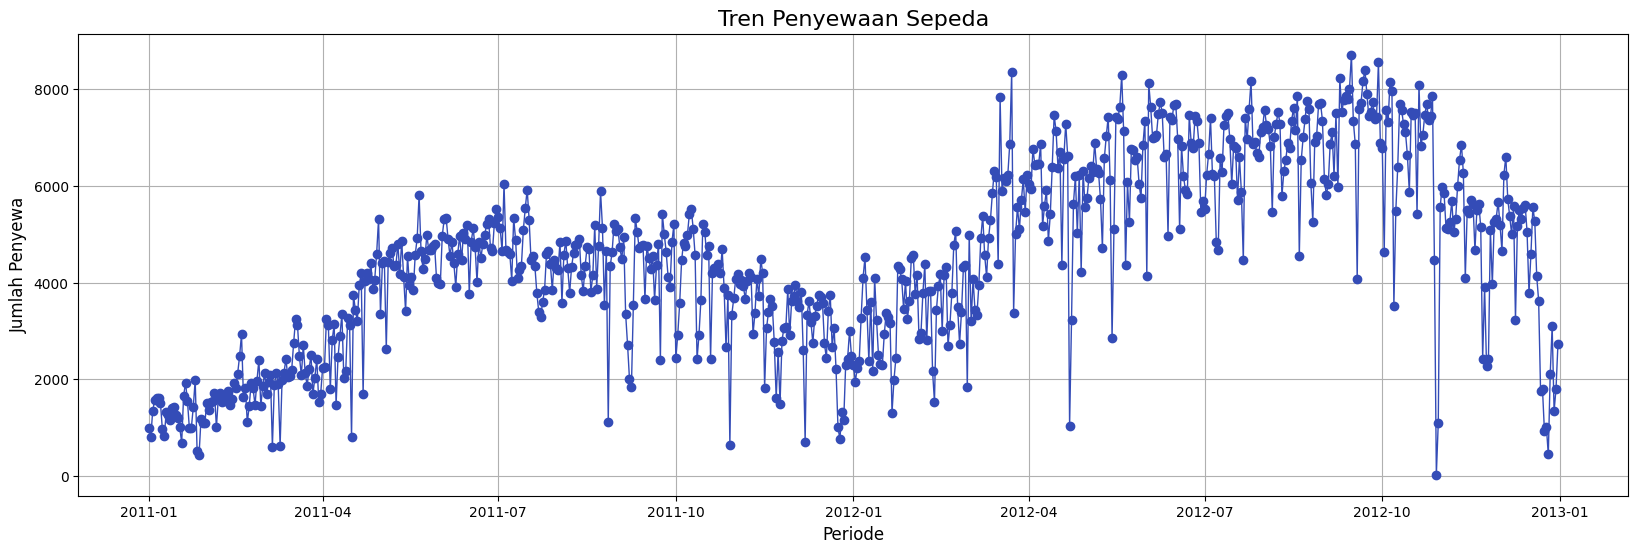

In [273]:
# Grafik tren penyewaan sepeda per hari
plt.figure(figsize=(20, 6))
plt.plot(day_df["Date"], day_df["Total Users"], marker='o', linewidth=1, color="#344CB7")

# Tambahkan judul dan label
plt.title("Tren Penyewaan Sepeda", loc="center", fontsize=16)
plt.xlabel("Periode", fontsize=12)
plt.ylabel("Jumlah Penyewa", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)

# Tampilkan plot
plt.show()

### Pertanyaan 2: Bagaimana perbedaan jumlah penyewa sepeda pada berbagai kondisi cuaca?

<ipython-input-274-453ceb102297>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  detail_penyewa_cuaca = day_df.groupby("Weather Condition").agg({"Total Users": "sum"}).reset_index()
<ipython-input-274-453ceb102297>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


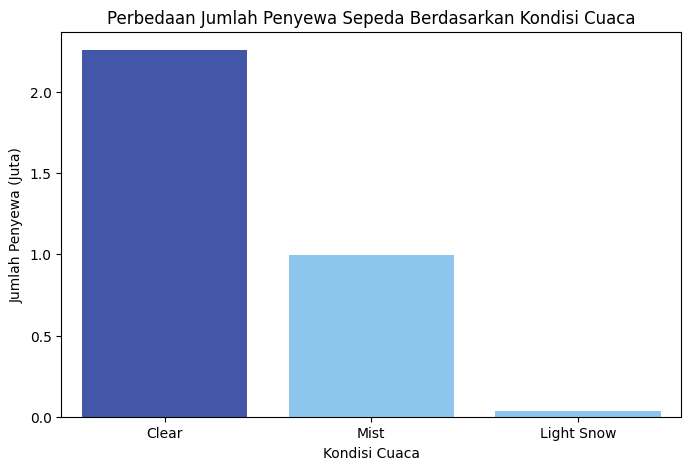

In [274]:
# Menghitung total penyewa berdasarkan kondisi cuaca
detail_penyewa_cuaca = day_df.groupby("Weather Condition").agg({"Total Users": "sum"}).reset_index()

# Ubah satuan menjadi juta
detail_penyewa_cuaca["Total Users"] = detail_penyewa_cuaca["Total Users"] / 1_000_000

# Definisi colors
colors = ["#344CB7", "#7BC9FF", "#7BC9FF"]

# Visualisasi dengan bar chart
plt.figure(figsize=(8, 5))
sns.barplot(
    data=detail_penyewa_cuaca,
    x="Weather Condition",
    y="Total Users",
    palette=colors
)

# Tambahkan judul dan label
plt.title("Perbedaan Jumlah Penyewa Sepeda Berdasarkan Kondisi Cuaca")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Jumlah Penyewa (Juta)")

# Tampilkan plot
plt.show()

### Pertanyaan 3: Apakah terdapat perbedaan signifikan dalam penyewaan sepeda di tiap musim?

<ipython-input-275-1f6aa8087321>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  detail_penyewa_musim = day_df.groupby("Season").agg({"Total Users": "sum"}).reset_index()
<ipython-input-275-1f6aa8087321>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


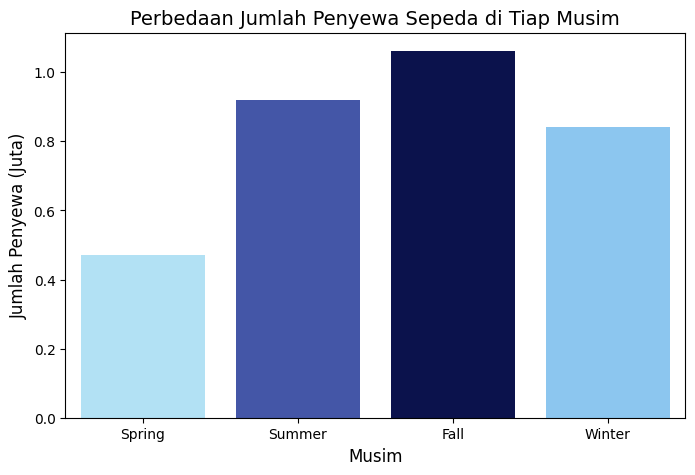

In [275]:
# Menghitung total penyewa berdasarkan musim
detail_penyewa_musim = day_df.groupby("Season").agg({"Total Users": "sum"}).reset_index()

# Ubah satuan menjadi juta
detail_penyewa_musim["Total Users"] = detail_penyewa_musim["Total Users"] / 1_000_000

# Definisi colors
colors = ["#A7E6FF", "#344CB7", "#000957", "#7BC9FF"]

# Visualisasi dengan bar chart
plt.figure(figsize=(8, 5))
sns.barplot(
    data=detail_penyewa_musim,
    x="Season",
    y="Total Users",
    palette=colors
)

# Menambahkan judul dan label
plt.title("Perbedaan Jumlah Penyewa Sepeda di Tiap Musim", fontsize=14)
plt.xlabel("Musim", fontsize=12)
plt.ylabel("Jumlah Penyewa (Juta)", fontsize=12)

# Tampilkan plot
plt.show()

### Pertanyaan 4: Pada jam berapa biasanya terjadi peningkatan penyewaan sepeda?

<ipython-input-276-acf7cc1711ad>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  detail_penyewa_jam = hour_df.groupby("Hour").agg({


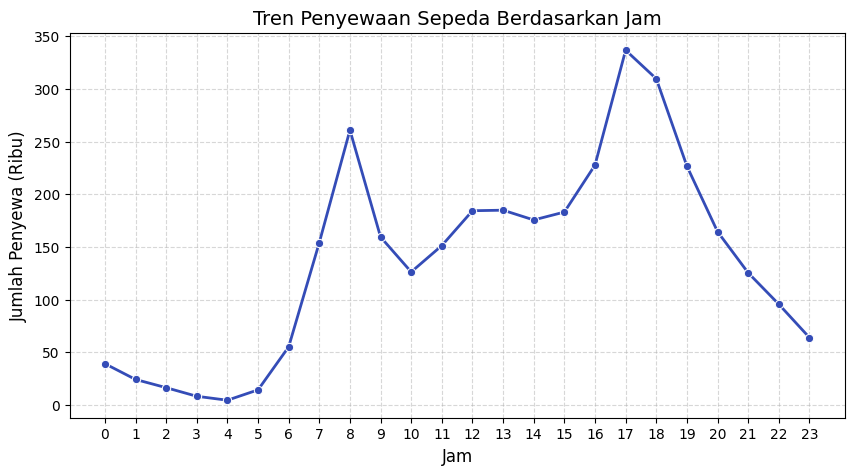

In [276]:
# Menghitung total penyewa berdasarkan jam
detail_penyewa_jam = hour_df.groupby("Hour").agg({
    "Total Users": "sum"
}).reset_index()

# Ubah satuan menjadi ribuan
detail_penyewa_jam["Total Users"] = detail_penyewa_jam["Total Users"] / 1_000

# Visualisasi dengan line chart
plt.figure(figsize=(10, 5))
sns.lineplot(
    data=detail_penyewa_jam,
    x="Hour",
    y="Total Users",
    marker="o",
    color="#344CB7",
    linewidth=2
)

# Menambahkan judul dan label
plt.title("Tren Penyewaan Sepeda Berdasarkan Jam", fontsize=14)
plt.xlabel("Jam", fontsize=12)
plt.ylabel("Jumlah Penyewa (Ribu)", fontsize=12)
plt.xticks(range(0, 24))  # Menampilkan setiap jam dari 0-23
plt.grid(True, linestyle="--", alpha=0.5)

# Tampilkan plot
plt.show()

### Pertanyaan 5: Bagaimana perbandingan jumlah pengguna registered dan casual?

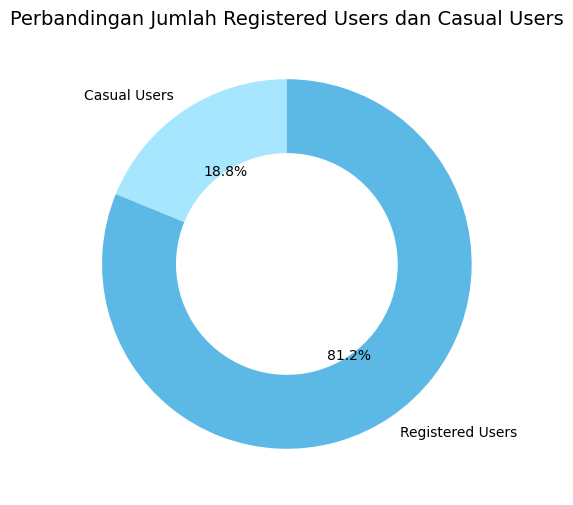

In [277]:
# Menghitung total Registered Users dan Casual Users
user_counts = day_df[["Casual Users", "Registered Users"]].sum()

# Label dan warna
labels = ["Casual Users", "Registered Users"]
colors = ["#A7E6FF", "#5CB8E4"]

# Membuat donut chart
plt.figure(figsize=(6, 6))
plt.pie(
    x=user_counts,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',  # Menampilkan persentase
    startangle=90,  # Memutar pie chart agar lebih estetis
    wedgeprops={'width': 0.4}  # Membuat efek donut
)

# Menambahkan judul
plt.title("Perbandingan Jumlah Registered Users dan Casual Users", fontsize=14)

# Tampilkan plot
plt.show()

**Insight:**
- **Pertanyaan 1**: Line Chart menunjukkan bahwa penyewaan sepeda menunjukkan tren musiman dengan peningkatan, puncak pada pertengahan tahun dan penurunan di akhir tahun, kemungkinan dipengaruhi oleh Musim.

- **Pertanyaan 2**: Jumlah penyewa sepeda tertinggi terjadi saat cuaca cerah (Clear), sementara kondisi berkabut (Mist) menyebabkan penurunan signifikan, dan penyewaan paling sedikit terjadi saat turun salju ringan (Light Snow), menunjukkan bahwa cuaca sangat memengaruhi minat penyewaan sepeda.

- **Pertanyaan 3**: Jumlah penyewa sepeda tertinggi terjadi pada musim gugur (Fall) dan musim panas (Summer), sementara musim semi (Spring) memiliki jumlah penyewa paling sedikit, menunjukkan bahwa cuaca yang lebih hangat dan stabil cenderung meningkatkan aktivitas bersepeda.

- **Pertanyaan 4**: Penyewaan sepeda mencapai puncaknya pada jam 8 pagi dan 5 sore, menunjukkan bahwa pengguna banyak menyewa sepeda pada jam berangkat dan pulang kerja atau beraktivitas.

- **Pertanyaan 5**: Penyewa sepeda dengan Registered Users memiliki persentase lebih banyak di bandingkan dengan Casual Users.

## Analisis Lanjutan (Clustering)

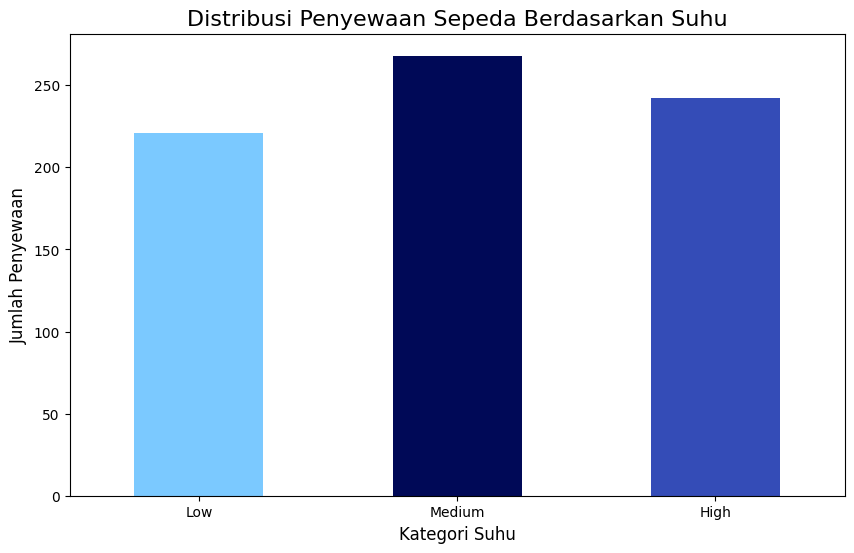

In [278]:
# Menentukan bin untuk Temperature
bins = [0, 15, 25, 41]  # Rentang suhu baru (sesuaikan dengan distribusi data)
labels = ["Low", "Medium", "High"]  # Kategori suhu baru

# Menambahkan kolom 'temperature_category' berdasarkan Temperature
day_df["temperature_category"] = pd.cut(day_df["Temperature"], bins=bins, labels=labels, right=False)

# Visualisasi distribusi dengan bar chart
plt.figure(figsize=(10, 6))
day_df["temperature_category"].value_counts().sort_index().plot(kind="bar", color=["#7BC9FF", "#000957", "#344CB7"])
plt.title("Distribusi Penyewaan Sepeda Berdasarkan Suhu", fontsize=16)
plt.xlabel("Kategori Suhu", fontsize=12)
plt.ylabel("Jumlah Penyewaan", fontsize=12)
plt.xticks(rotation=0)
plt.show()

Hasil clustering menunjukkan bahwa penyewaan sepeda tertinggi terjadi pada suhu Medium (15-25°C), kemungkinan karena kondisi yang nyaman untuk bersepeda. Penyewaan tetap tinggi pada suhu High (26-40°C), sementara suhu Low (0-14°C) memiliki jumlah penyewaan terendah, kemungkinan akibat cuaca yang kurang mendukung. Namun, dari ketiga kategori suhu, tidak ada perbedaan yang signifikan satu sama lain.









## Conclusion

1.   Bagaimana tren penyewaan sepeda dari waktu ke waktu?

     > Line Chart menunjukkan bahwa penyewaan sepeda menunjukkan tren musiman dengan peningkatan, puncak pada pertengahan tahun dan penurunan di akhir tahun, kemungkinan dipengaruhi oleh Musim.

2.   Bagaimana perbedaan jumlah penyewaan sepeda pada berbagai kondisi cuaca?

     > Jumlah penyewa sepeda tertinggi terjadi saat cuaca cerah (Clear), sementara kondisi berkabut (Mist) menyebabkan penurunan signifikan, dan penyewaan paling sedikit terjadi saat turun salju ringan (Light Snow), menunjukkan bahwa cuaca sangat memengaruhi minat penyewaan sepeda.

3.   Apakah terdapat perbedaan signifikan dalam penyewaan sepeda di tiap musim?

     > Jumlah penyewa sepeda tertinggi terjadi pada musim gugur (Fall) dan musim panas (Summer), sementara musim semi (Spring) memiliki jumlah penyewa paling sedikit, menunjukkan bahwa cuaca yang lebih hangat dan stabil cenderung meningkatkan aktivitas bersepeda.
     
4.   Pada jam berapa biasanya terjadi peningkatan penyewaan sepeda?

     > Penyewaan sepeda mencapai puncaknya pada jam 8 pagi dan 5 sore, menunjukkan bahwa pengguna banyak menyewa sepeda pada jam berangkat dan pulang kerja atau beraktivitas.

5.   Bagaimana perbandingan jumlah pengguna registered dan casual?

     > Penyewa sepeda dengan Registered Users memiliki persentase lebih banyak di bandingkan dengan Casual Users.

In [279]:
day_df.to_csv("day_clean.csv", index=False)
hour_df.to_csv("hour_clean.csv", index=False)